<a href="https://colab.research.google.com/github/yasuhiroinoue/AppMathSci/blob/main/%E5%BF%9C%E7%94%A8%E6%95%B0%E7%90%86(12_06).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**応用数理科学（第9回）**##

状態空間モデルとは、時系列データ（観測値）の生成を、その時系列の背後にある状態の時間変化と、その状態の観測に分けて捉えるモデルである。

$l$成分の時系列$y_n$があり、直接は観察できない状態$x_n$を$k$次元ベクトルとする。以下を状態空間モデルという。
$$x_n = F_nx_{n-1}+G_nv_n \tag{1}$$
$$y_n = H_nx_n + w_n\tag{2}$$
式(1)をシステムモデル、式(2)を観測モデルという。
$v_n$は正規白色雑音で分散共分散行列$Q_n$のシステムノイズ、
$w_n$は正規白色雑音で分散共分散行列$R_n$の観測ノイズであり、いずれも平均は零ベクトル。つまり、$v_n \sim N(0,Q_n)$、$w_n \sim N(0,R_n)$ということ。
$F_n$は$k\times k$行列、$G_n$は$k\times m$行列、$H_n$は$l\times k$行列。

時系列解析に用いられる線形モデルを状態空間モデルに表すことができる。

例えば、前回の自己回帰モデルで、$m$次のARモデルを考える。
$$
y_n = \sum_{i=1}^m a_iy_{n-i} + v_n \tag{3}
$$
状態ベクトル$x_n$を
$$
x_n = \left (
\begin{matrix}
y_n\\
y_{n-1}\\
\vdots\\
y_{n-m+1}
\end{matrix}
\right )\tag{4}
$$
と定義すると、式(1)と(3)より、
$$
F=
\left (
\begin{matrix}
a_1 & a_2 & \cdots & a_m\\
1 && & \\
&  \ddots &&&\\
& &  1 & 0
\end{matrix}
\right )
$$

$$
G=
\left (
\begin{matrix}
1\\
0\\
\vdots\\
0
\end{matrix}
\right )
$$

式(2)と(4)より
$$
H=
\left ( 1, 0, \cdots, 0\right )
$$
また、システムノイズおよび観測ノイズを$Q=\sigma^2$、$R=0$とおけば、ARモデルの状態空間モデルによる表現となる。

##**カルマンフィルタによる状態推定**##
観測値$Y_j=\{y_1,\cdots,y_j\}$が得られたときに、時刻$n$における状態$x_n$の推定問題。


*   $j<n$ 予測
*   $j=n$ フィルタ
*   $j>n$ 平滑化

$Y_j$が得られたときの$x_n$の条件付き平均と分散共分散行列を
$$
x_{n|j} = E[x_n | Y_j]\\
V_{n|j} = E[(x_n-x_{n|j})(x_n-x_{n|j})^T]
$$
と表す。

次の２段階で、時刻$n$の状態$x_n$を推定する。

**予測ステップ**
$$
x_{n|n-1} = F_nx_{n-1|n-1}\\
V_{n|n-1} = F_nV_{n-1|n-1}F_n^T+G_nQ_nG_n^T
$$

**フィルタリングステップ**

$$
K_n=V_{n|n-1}H_n^T\left(H_nV_{n|n-1}H_n^T+R_n \right)^{-1}\\
x_{n|n}=x_{n|n-1}+K_n\left(y_n - H_n x_{n|n-1} \right)\\
V_{n|n} = \left(I - K_nH_n\right)V_{n|n-1}
$$

まず、予測ステップで、１期先の予測値は、現時点で得られている（１期前で得た）$x_{n-1|n-1}$に$F_n$を演算するのみである。分散共分散行列$V_{n|n-1}$の更新には$F_n$による変換の影響と、システムノイズの影響が入る。

次にフィルタリングステップで、まずカルマンゲイン$K_n$が求められる。
カルマンゲインとは、直感的には、観測されるノイズのうち、システムノイズを起源とする割合である。
$x_{n|n}$の更新式で、右辺第２項の意味は、予測値の観測値に対する誤差をカルマンゲイン分だけ混ぜる。あるいは次のように式変形すると観測値との加重平均とも解釈できる。
$$x_{n|n}=K_ny_n+\left(I - K_nH_n \right)x_{n|n-1}$$
$V_{n|n}$の更新は、$y_n$が入ることによる状態推定の精度改善を表している。


**長期予測**

カルマンフィルタを用いて、長期予測をどのように行えば良いか。
まず、観測値がまだ得られていない１期先について、$Y_{n+1}=Y_{n}$と考える。
そうすると、
$$
E[x_{n+1} | Y_{n+1}] = E[x_{n+1} | Y_n]
$$
より、$x_{n+1|n+1}=x_{n+1|n}$となり、また、
$$
E[(x_{n+1}-x_{n+1|n+1})(x_{n+1}-x_{n+1|n+1})^T]=E[(x_{n+1}-x_{n+1|n})(x_{n}-x_{n+1|n})^T]
$$
より、$V_{n+1|n+1}=V_{n+1|n}$となる。つまり、フィルタリングステップをスキップして、予測ステップだけ回せば良いことが分かる。

$i=1,\cdots,j$について
$$
x_{n+i|n} = F_{n+i}x_{n+i-1|n}\\
V_{n+i|n}=F_{n+i}V_{n+i-1|n}F^T_{n+i}+G_{n+i}Q_{n+i}G^T_{n+i}
$$
$V_{n+i|n}$の式の右辺第２項に必ずシステムノイズの影響が加わるので、予測ステップを繰り返すごとに、予測値分布の分散は大きくなり続ける。

###**解説**###

観測$y$が与えられたときに、システムの状態$x$の事後確率分布$p(x|y)$はベイズの定理から
$$
p(x|y) = \frac{p(y|x)p(x)}{p(y)}
$$
事後確率分布$p(x|y)$を最大にする$x$は
$$
\hat x_{map} = \mathop{\rm arg~max}_x p(y|x)p(x)
$$
である。$p(y)$は$x$に依存していないので、最尤推定からは省略できる。これをMAP(Maximum a posteriori)推定という。


$$
p(x) = C_1 \exp\left(-\frac{(x-\mu_p)^2}{2\sigma_q^2}\right)\\
p(y|x) = C_1 \exp\left(-\frac{(y-x)^2}{2\sigma_r^2}\right)\\
p(x|y) = C(y)\exp\left(-\frac{(y-x)^2}{2\sigma_r^2}\right)\exp\left(-\frac{(x-\mu_p)^2}{2\sigma_q^2}\right)
$$
とすると、$p(x|y)$の最大は、指数部を平方完成し
$$
-\frac{1}{2\sigma_r^2\sigma_q^2}\left\{(\sigma_r^2+\sigma_q^2)\left(x-\frac{\sigma_r^2 \mu_p + \sigma_q^2 y}{\sigma_r^2+\sigma_q^2} \right)^2 +\sigma_q^2y^2+\sigma_r^2\mu_p^2 -(\sigma_r^2+\sigma_q^2)\left(\frac{\sigma_r^2 \mu_p + \sigma_q^2 y}{\sigma_r^2+\sigma_q^2}\right)^2\right\}
$$
したがって
$$
\hat x_{map} = \frac{\sigma_r^2 \mu_p + \sigma_q^2 y}{\sigma_r^2+\sigma_q^2}\\
= \mu_p + \left(\frac{\sigma_q^2}{\sigma_r^2+\sigma_q^2} \right)(y-\mu_p)
$$
である。事後確率分布の分散は
$$
\sigma^2=\frac{\sigma_r^2\sigma_q^2}{\sigma_r^2+\sigma_q^2}
$$
と計算できる。


**最小二乗推定**

$$
\hat x_{mmse} = \arg \min_{\hat x} J(\hat x, x)
$$
$$
J(\hat x, x)=E[(\hat x - x)^T(\hat x - x)|Y_k ]
$$

$\hat x$を推定値、$x$を真値として、コスト関数$J(\hat x, x)$を最小とする$\hat x$を推定することを最小二乗推定という。(mmse: Minimum Mean Square Error)

$J$の停留条件を考える。
$$
\frac{\partial J(\hat x, x)}{\partial \hat x} = 2\int_{-\infty}^\infty(\hat x -x)p(x|Y_k)dx=0
$$
式変形して
$$
\hat x\int_{-\infty}^\infty p(x|Y_k)dx = \int_{-\infty}^\infty x p(x|Y_k)dx
$$
より
$$
\hat x_{mmse} = E[x|Y_k]
$$
となる。
$\hat x_{mmse}$は、時点$k-1$の事後確率分布を時点$k$を推定する事前確率分布とし、時点$k$でのデータから尤度関数を作ってベイズ更新して、その事後確率分布の平均値として求められる。これらに正規分布を用いると、平均と分散共分散だけを考えれば良く、それが線形カルマンフィルタである。なお、事後確率を事前確率に用いる際に、$\hat x_{mmse}$を起点に、システムモデルで予測値を求める必要があるが、システムモデルが線形であれば、正規分布が保たれる（平均値と分散がスケール変換されるのみ）。一方、システムモデルが非線形であると、正規分布が保たれないので、線形カルマンフィルタは使えない。そのときは拡張カルマンフィルタ、粒子フィルタ、逐次モンテカルロ法を使う。逐次モンテカルロ法については次回の講義で扱う。



###**平滑化**###
時系列$Y_N=\{y_1,\cdots,y_N\}$が得られたとき、途中の状態$x_n$を推定する。
時間的に逆方向に次のアルゴリズムを適用する。
$$
A_n = V_{n|n}F_{n+1}^TV_{n+1|n}^{-1}\\
x_{n|N} = x_{n|n} + A_n\left(x_{n+1|N}-x_{n+1|n}\right)\\
V_{n|N}=V_{n|n}+A_n\left(V_{n+1|N}-V_{n+1|n} \right)A_n^T
$$
上式に登場する時刻$n=N$の時点での$x_{N|N}$と$V_{N|N}$は平滑化の初期値として必要となるが、カルマンフィルタによって求めておく。

###**プログラム**###


In [1]:
##1変量時系列、AR(1)##
import numpy as np
import numpy.random
import matplotlib.pyplot as plt

time_end = 100
dt = 0.5
time = np.arange(0, time_end, dt)
n_samples = len(time)

# 状態空間モデル #
F=1
H=1
G=1

## Q, Rを変更して、カルマンゲインの値がどのように変わるか確認しよう ##
Q=1 #システムノイズの分散
R=10 #観測ノイズの分散
##

##実験用の時系列生成##
z = np.zeros(n_samples)
y = np.zeros(n_samples)

for i in range(1,n_samples):
#Ground Truth of system state
  z[i] = F*z[i-1]  + G*np.random.normal(0,np.sqrt(Q))
#Observed value
  y[i] = H*z[i]+ np.random.normal(0,np.sqrt(R))


##カルマンフィルタ
xnn_ = np.zeros(n_samples)
xnn = np.zeros(n_samples)

##初期値
Vnn = np.zeros(n_samples)
Vnn[0] = Q

Vnn_=np.zeros(n_samples)
Kn = np.zeros(n_samples)

for i in range(1,n_samples):
  #One-step-ahead forecast step
  xnn_[i] = F*xnn[i-1]
  FT = F
  GT = G
  HT = H
  Vnn_[i] = F*Vnn[i-1]*FT + G*Q*GT

  #Filtering step
  Total_Var_INV = 1/(Vnn_[i]+R)
  Kn[i] = Vnn_[i]*HT*Total_Var_INV

  xnn[i] = xnn_[i] + Kn[i]*(y[i]-H*xnn_[i])
  Vnn[i] = (1-Kn[i]*H)*Vnn_[i]

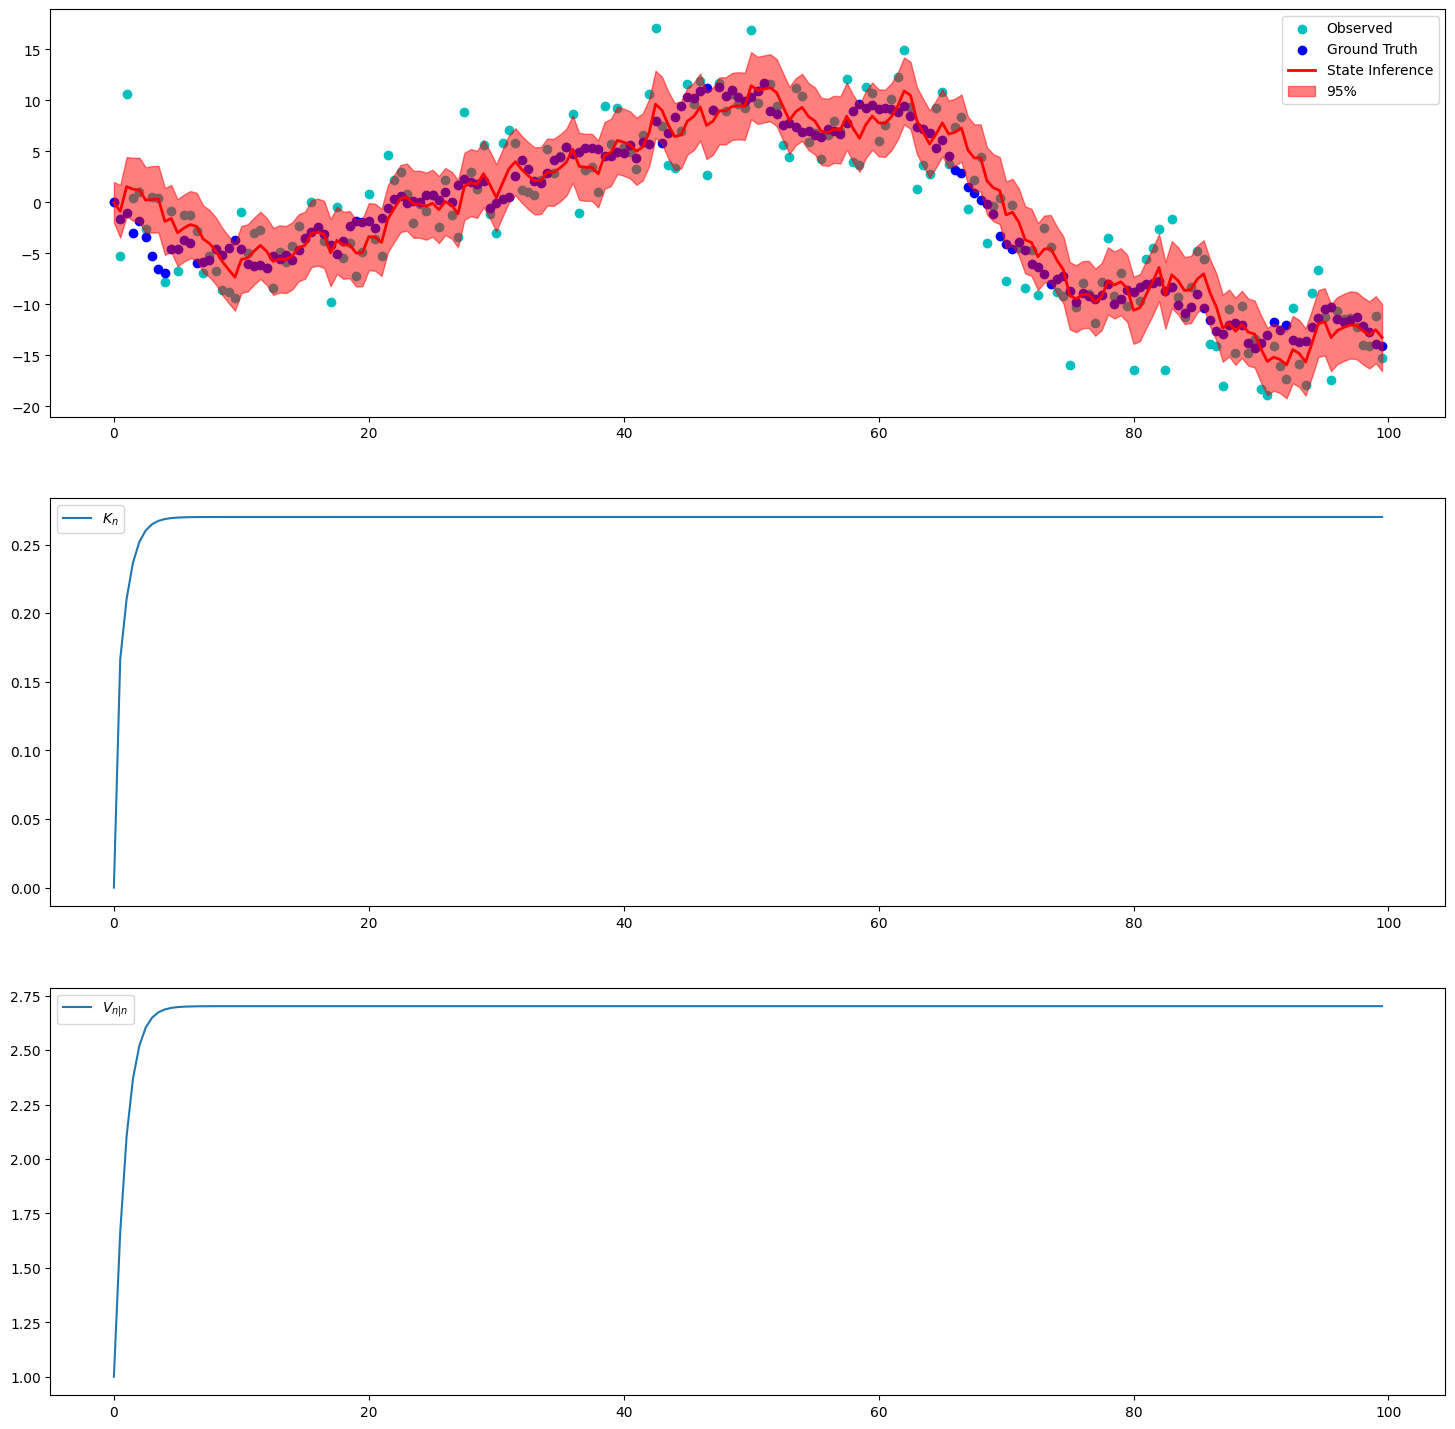

In [2]:
##結果可視化
plt.rcParams["figure.figsize"] = (18, 18)
lower = xnn-2*np.sqrt(Vnn)
upper = xnn+2*np.sqrt(Vnn)

plt.subplot(3,1,1)
plt.scatter(time,y,label="Observed",color="c")
plt.scatter(time,z,label="Ground Truth",color="b")
plt.plot(time,xnn,color='r',linewidth=2,label="State Inference")
plt.fill_between(time, lower, upper, color="r", alpha=0.5, label="95%")
plt.legend()
plt.subplot(3,1,2)
plt.plot(time,Kn, label="$K_n$")
plt.legend()
plt.subplot(3,1,3)
plt.plot(time,Vnn, label="$V_{n|n}$")
plt.legend()

In [3]:
##平滑化
An = np.zeros(n_samples)
sx= np.zeros(n_samples)

#初期値
FT = F
GT = G
HT = H
sx[n_samples-1] = xnn[n_samples-1]
VnN = np.zeros(n_samples)
VnN[n_samples-1]= Vnn[n_samples-1]

#Smoothing
for i in range(1,n_samples):
  n=(n_samples-1)-i
  An[n]=Vnn[n]*FT/Vnn_[n+1]
  sx[n]=xnn[n]+An[n]*(sx[n+1]-xnn_[n+1])
  AnT=An[n]
  VnN[n] = Vnn[n]+An[n]*(VnN[n+1]-Vnn_[n+1])*AnT

カルマンフィルタによる推定値は、真値(ground truth)に近い値を推定できていることが分かる。

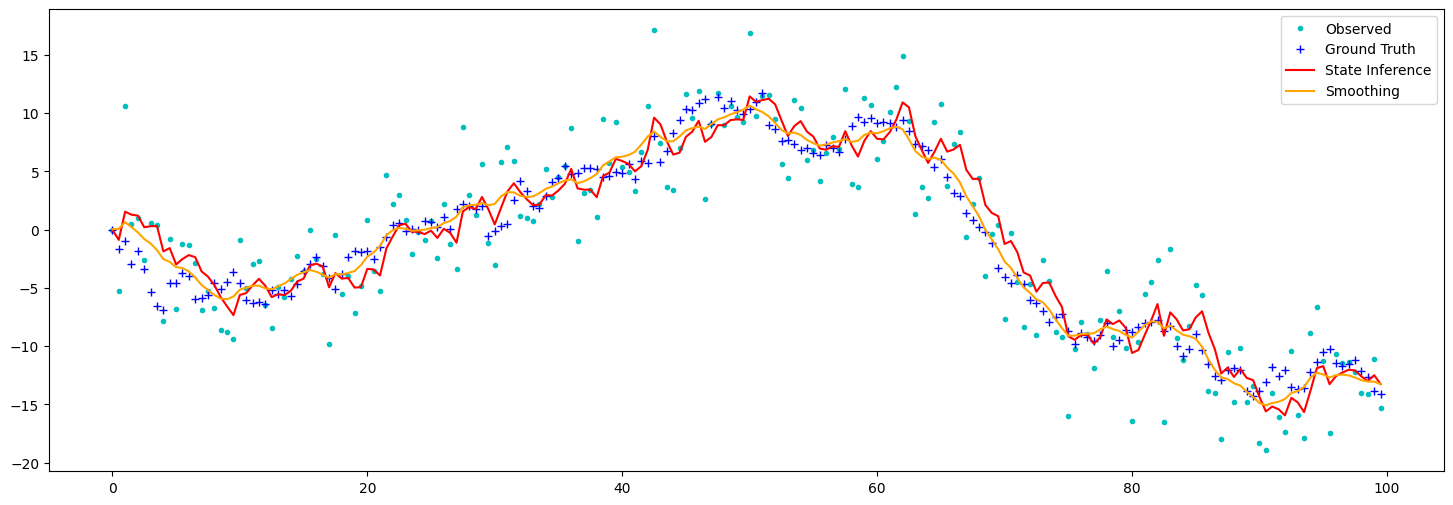

In [4]:
plt.rcParams["figure.figsize"] = (18, 6)

plt.plot(time,y,'.',label="Observed",color="c")
plt.plot(time,z,'+',label="Ground Truth",color="b")
plt.plot(time,xnn,color='r',label="State Inference")
plt.plot(time,sx, color='orange', label="Smoothing")
plt.legend()

**Python Statsmodels**によるカルマンフィルタ

下記のコードでは、$Q$、$R$は最尤推定により求められる。

In [5]:
import statsmodels.api as sm

In [6]:
class LocalLevel(sm.tsa.statespace.MLEModel):
# maximum likelihood estimation
# https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.mlemodel.MLEModel.html
    _start_params = [1, 1]
    _param_names = ['System_Noise.Q', 'Measurement_Noise.R']

    def __init__(self, endog):
        super(LocalLevel, self).__init__(endog, k_states=1, initialization='diffuse')

        self['design', 0, 0] = 1
        self['transition', 0, 0] = 1
        self['selection', 0, 0] = 1

    def transform_params(self, unconstrained):
        return unconstrained**2

    def untransform_params(self, unconstrained):
        return unconstrained**0.5

    def update(self, params, **kwargs):
        params = super(LocalLevel, self).update(params, **kwargs)

        self['state_cov', 0, 0] = params[0]
        self['obs_cov', 0, 0] = params[1]

In [7]:
mod = LocalLevel(y)

In [8]:
res = mod.fit(full_output=True,maxiter=200)
print(res.summary())

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                  200
Model:                     LocalLevel   Log Likelihood                -556.569
Date:                Sun, 15 Dec 2024   AIC                           1119.137
Time:                        09:08:08   BIC                           1129.032
Sample:                             0   HQIC                          1123.142
                                - 200                                         
Covariance Type:                  opg                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
System_Noise.Q          1.2713      0.480      2.649      0.008       0.331       2.212
Measurement_Noise.R    11.0891      1.294      8.572      0.000       8.554      13.625
Ljung-Box (L1) (

In [9]:
print(res.mle_retvals)

{'fopt': 2.782843106196335, 'gopt': array([4.64916994e-07, 5.80424597e-07]), 'fcalls': 33, 'warnflag': 0, 'converged': True, 'iterations': 10}


### 含まれるキーの説明

#### `fopt`
- **目的関数 (log-likelihood) の最小値または最大値** を表します。  
- ここでは  
  `fopt = 2.782843106196335`  
- MLEでは、負の対数尤度 (negative log-likelihood) が **最小化** されます。

#### `gopt`
- **勾配の最小値** を示す配列です。  
- 値:  
  `array([4.64916994e-07, 5.80424597e-07])`  
- 非常に小さい値なので、最適化が十分に収束していることを示します。

#### `fcalls`
- 目的関数 (尤度関数) の **呼び出し回数** です。  
- この場合、尤度関数は **33回** 評価されました。

#### `warnflag`
- **警告フラグ** で、最適化が正常に終了したかどうかを示します。  
  - `0`: 正常に収束  
  - `1` や `2`: 収束しなかった、または何らかの問題が発生  
- ここでは  
  `warnflag = 0`  
  正常に収束しています。

#### `converged`
- 最適化が **収束したかどうか** を示すブール値です。  
- `True` であれば、最適化が成功裏に終了したことを意味します。

#### `iterations`
- 収束するまでの **反復回数** です。  
- このケースでは **10回** の反復で収束しました。


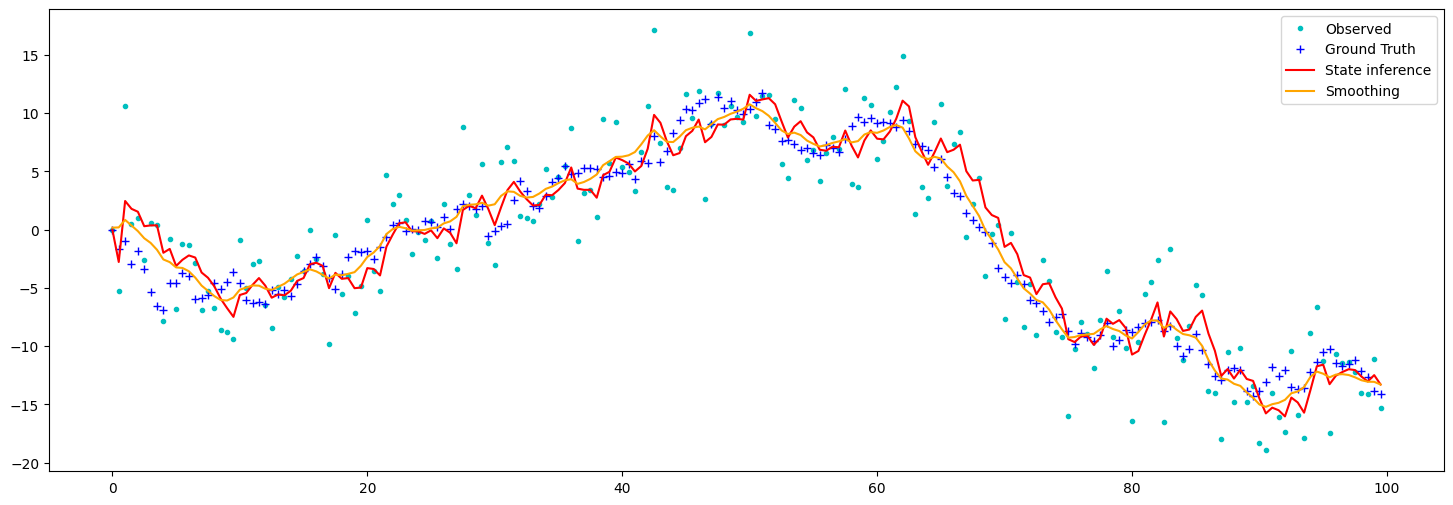

In [10]:
plt.plot(time,y,'.',label="Observed",color="c")
plt.plot(time,z,'+',label="Ground Truth",color="b")
plt.plot(time,res.predicted_state[0,1:,],label="State inference",color="red")
plt.plot(time,res.smoothed_state[0,:],label="Smoothing",color="orange")
plt.legend()